In [16]:
# only needed if running from colab
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
layers = keras.layers

In [18]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bubble Tea Rating.xlsx")
df.head()

,name,product,rating,comments
0,108 Matcha Saro,Ice Matcha Green Tea,6.0,"Normal Matcha green tea, not much to say about..."
1,80 Tang,Full House Milk Tea,6.0,Standard Milk tea with 4 different toppings in...
2,Artea,Mango Milkshake,7.5,Good drink with actual mango chunks. Only issu...
3,Ayi Soya Milk,Brown Sugar Soya Milk,4.0,"Not good, too thick. Soy milk does not go well..."
4,BlackBall,Fresh Milk Tea,6.0,Very normal milk tea that is decent for its price


In [19]:
df.describe()

,rating
count,83.000000
mean,6.132530
std,1.015383
min,3.000000
25%,5.750000
50%,6.000000
75%,7.000000
max,8.500000


In [20]:
# split dataset into 80/20 training/testing
split = round(len(df)*0.8)
train_product = df['product'][:split]
train_comments = df['comments'][:split]
train_label = df['rating'][:split]
test_product = df['product'][split:]
test_comments = df['comments'][split:]
test_label = df['rating'][split:]

In [21]:
train_comments.head()

0    Normal Matcha green tea, not much to say about...
1    Standard Milk tea with 4 different toppings in...
2    Good drink with actual mango chunks. Only issu...
3    Not good, too thick. Soy milk does not go well...
4    Very normal milk tea that is decent for its price
Name: comments, dtype: object

In [22]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=100, oov_token="OOV")
tokenizer.fit_on_texts(train_comments)
word_index = tokenizer.word_index
print(word_index) # look its a dictionary of all the words remus uses in his reviews (for train data)


{'OOV': 1, 'the': 2, 'milk': 3, 'tea': 4, 'like': 5, 'is': 6, 'you': 7, 'it': 8, 'normal': 9, 'not': 10, 'tastes': 11, 'and': 12, 'a': 13, 'to': 14, 'i': 15, 'with': 16, 'that': 17, 'sugar': 18, 'but': 19, 'for': 20, 'get': 21, 'so': 22, 'of': 23, 'they': 24, 'if': 25, 'good': 26, 'price': 27, 'as': 28, 'its': 29, 'brown': 30, 'than': 31, 'really': 32, 'slightly': 33, 'taste': 34, 'much': 35, 'this': 36, 'well': 37, 'very': 38, 'better': 39, 'can': 40, 'in': 41, 'inside': 42, 'drink': 43, 'what': 44, 'would': 45, 'pretty': 46, 'sweet': 47, 'standard': 48, 'too': 49, 'decent': 50, 'from': 51, 'cup': 52, 'one': 53, 'pearls': 54, 'about': 55, 'different': 56, 'on': 57, 'there': 58, 'are': 59, 'also': 60, 'do': 61, 'will': 62, 'weird': 63, 'was': 64, 'special': 65, 'pearl': 66, 'expect': 67, 'less': 68, 'chewy': 69, 'at': 70, 'nothing': 71, 'nice': 72, 'or': 73, 'my': 74, 'actual': 75, 'only': 76, 'does': 77, 'go': 78, 'tasting': 79, 'imo': 80, 'use': 81, 'version': 82, 'regular': 83, 'fre

In [23]:
# pad reviews so theyre the same length
train_sequences = tokenizer.texts_to_sequences(train_comments)
train_sequences = keras.preprocessing.sequence.pad_sequences(train_sequences, truncating='post')
max_length = len(train_sequences[0])

test_sequences = tokenizer.texts_to_sequences(test_comments)
test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length,truncating='post')


vocab_size=len(word_index)
max_length = len(train_sequences[0])
embedding_dim = 16 # dimension of embedding vector which is like a vector representing how good/bad/blue/orange something is

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='mae',optimizer='adam')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 88, 16)            6336      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 6,769
Trainable params: 6,769
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs =60
history = model.fit(train_sequences, train_label, epochs=num_epochs, validation_data=(test_sequences, test_label), verbose=2)

Epoch 1/60
3/3 - 1s - loss: 6.1439 - val_loss: 6.0882 - 929ms/epoch - 310ms/step
Epoch 2/60
3/3 - 0s - loss: 6.1436 - val_loss: 6.0872 - 43ms/epoch - 14ms/step
Epoch 3/60
3/3 - 0s - loss: 6.1423 - val_loss: 6.0802 - 41ms/epoch - 14ms/step
Epoch 4/60
3/3 - 0s - loss: 6.1313 - val_loss: 6.0620 - 43ms/epoch - 14ms/step
Epoch 5/60
3/3 - 0s - loss: 6.1126 - val_loss: 6.0427 - 41ms/epoch - 14ms/step
Epoch 6/60
3/3 - 0s - loss: 6.0943 - val_loss: 6.0253 - 40ms/epoch - 13ms/step
Epoch 7/60
3/3 - 0s - loss: 6.0781 - val_loss: 6.0090 - 42ms/epoch - 14ms/step
Epoch 8/60
3/3 - 0s - loss: 6.0619 - val_loss: 5.9909 - 57ms/epoch - 19ms/step
Epoch 9/60
3/3 - 0s - loss: 6.0432 - val_loss: 5.9699 - 42ms/epoch - 14ms/step
Epoch 10/60
3/3 - 0s - loss: 6.0221 - val_loss: 5.9474 - 44ms/epoch - 15ms/step
Epoch 11/60
3/3 - 0s - loss: 5.9995 - val_loss: 5.9237 - 45ms/epoch - 15ms/step
Epoch 12/60
3/3 - 0s - loss: 5.9753 - val_loss: 5.8972 - 44ms/epoch - 15ms/step
Epoch 13/60
3/3 - 0s - loss: 5.9487 - val_loss:

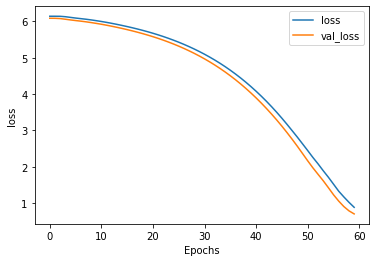

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "loss")

In [64]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("Review with padding:")
print(decode_sentence(test_sequences[0]))
print("Encoded review:")
print(test_sequences[0])
print("Rating:")
print(test_label.iloc[0])

print(model.predict(np.array([test_sequences[0]])))

Review with padding:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? standard milk tea nothing special
Encoded review:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 48  3  4 71 65]
Rating:
6.0
1/1 [==============================] - 0s 141ms/step
[[5.938948]]


In [72]:
# bubble tea reviews testing
sentence = ["the best milk tea i have ever had, tastes heavenly and worth every penny, highly recommended", 
            "tastes bad, very bland, too expensive, not worth the money. do not buy"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, truncating='post')
print(model.predict(padded))

1/1 [==============================] - 0s 36ms/step
[[5.946418]
 [5.916676]]
